In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')#for my Macbook 
sys.path.insert(0, '/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')#for my Linux Machine

In [2]:
from datasets import SM_VS_ESI_ANOM_READ, SCAN_META_READ, DROUGHT_READ

In [3]:
SM_VS_ESI_ANOM_READ

,Date,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807
2,2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192
3,2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815
4,2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292
...,...,...,...,...,...,...,...,...,...,...
9669,2020-12-02,1.522,2053:AL:SCAN,49,49,NaN,-0.038652,0.551961,0.416028,-1.223196
9670,2020-12-09,1.082,2053:AL:SCAN,50,50,NaN,-0.628406,0.522642,0.541675,-0.954042
9671,2020-12-16,0.068,2053:AL:SCAN,51,51,NaN,-0.564758,0.286017,0.215204,-0.923545
9672,2020-12-23,0.167,2053:AL:SCAN,52,52,NaN,-0.662174,0.122894,-0.009764,0.495781


In [4]:
#create percent rank of sm anomalies 
SM_VS_ESI_ANOM_READ['2in_pr'] = SM_VS_ESI_ANOM_READ['2inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['4in_pr'] = SM_VS_ESI_ANOM_READ['4inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['8in_pr'] = SM_VS_ESI_ANOM_READ['8inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['20in_pr'] = SM_VS_ESI_ANOM_READ['20inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['40in_pr'] = SM_VS_ESI_ANOM_READ['40inANOM'].rank(pct=True) * 100.0

In [5]:
def droughtLabel(percent_rank):
    #this function takes in a percent rank (float) and returns a drought category (float)
    if (percent_rank <= 30.0) & (percent_rank>=21.0):
        return 0.0
    elif (percent_rank > 30.0):
        return np.nan
    elif (percent_rank <= 20.0) & (percent_rank>=11.0):
        return 1.0
    elif (percent_rank <= 10.0) & (percent_rank>=6.0):
        return 2.0
    elif (percent_rank <=5.0) & (percent_rank>=3.0):
        return 3.0
    elif (percent_rank <=3.0):
        return 4.0

In [6]:
#get the drought category for percent rank (DC) for soil moisture stations (SMS)
SM_VS_ESI_ANOM_READ['2inSMSDC'] = SM_VS_ESI_ANOM_READ['2in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['4inSMSDC'] = SM_VS_ESI_ANOM_READ['4in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['8inSMSDC'] = SM_VS_ESI_ANOM_READ['8in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['20inSMSDC']= SM_VS_ESI_ANOM_READ['20in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['40inSMSDC']= SM_VS_ESI_ANOM_READ['40in_pr'].apply(droughtLabel)

In [7]:
#what is the average ESI for each drought category?
depths = []
category = []
averageESI = []

for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for j in droughtFrame[i].unique():
        categoryFrame = droughtFrame[droughtFrame[i]==j]
        if np.isnan(j):
            pass
        else:
            avgESI = categoryFrame['ESI'].mean()
            depths.append(i)
            category.append(j)
            averageESI.append(avgESI)

df = pd.DataFrame()
df['depth'] = depths
df['category']=category
df['meanESI']=averageESI

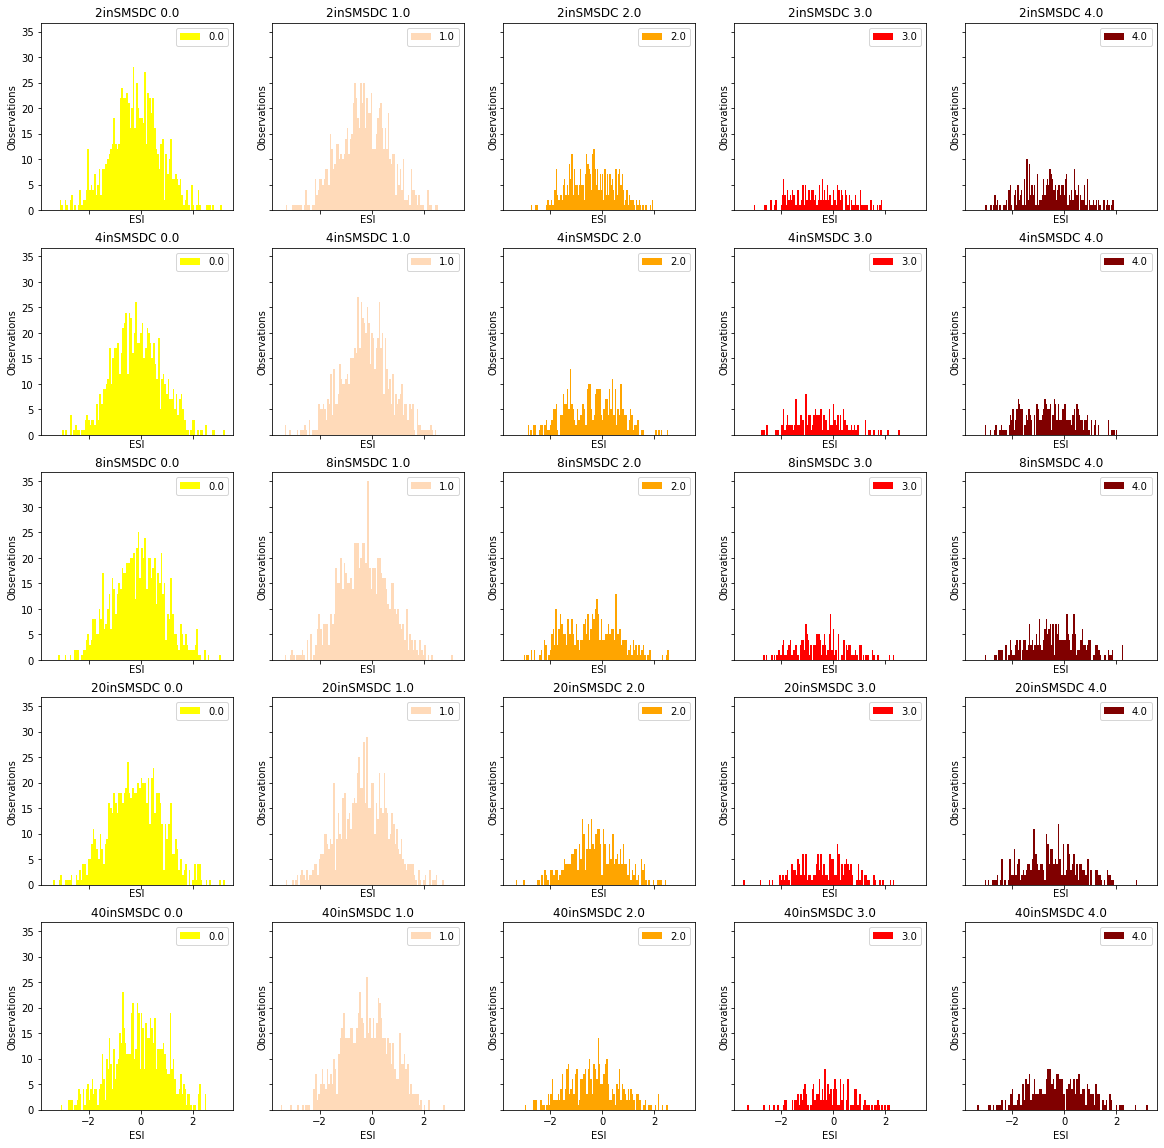

In [8]:
#what is the variability for each category?
fig, ax = plt.subplots(figsize=(20,20),nrows=5, ncols=5, sharey=True, sharex=True)
axes = ax.flatten()
count = 0
colorKey = {0:"yellow",1:"peachpuff",2:"orange",3:"red",4:"maroon"}
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for c in [0.0, 1.0, 2.0, 3.0, 4.0]:
        categoryFrame=droughtFrame[droughtFrame[i]==c]
        if np.isnan(c):
            pass
        else:
            axes[count].hist(categoryFrame['ESI'], label=c, bins=100, color=colorKey.get(c))
            axes[count].legend()
            axes[count].set_title(i + " " + str(c))
            axes[count].set_ylabel("Observations")
            axes[count].set_xlabel("ESI")
            count+=1
          

In [9]:
df.sort_values(["depth", "category"], inplace=True)

Text(0.5, 0, 'Drought Category')

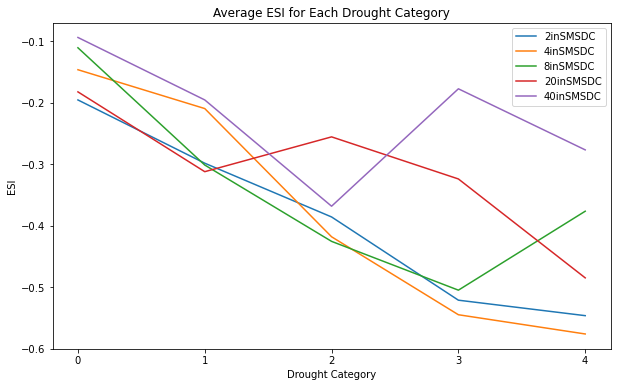

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    depthFrame = df[df['depth']==i]
    plotFrame = depthFrame.set_index('category')
    ax.plot(plotFrame['meanESI'], label=i)
    ax.legend()
ax.xaxis.set_ticks([0,1,2,3,4])
ax.set_title("Average ESI for Each Drought Category")
ax.set_ylabel("ESI")
ax.set_xlabel("Drought Category")

In [11]:
scanTriplets = SCAN_META_READ[['station', 'Station Name']]

In [12]:
DROUGHT_READ.rename(columns={'station_names':'Station Name', 'date':'Date'}, inplace=True)

In [13]:
drought_data = DROUGHT_READ.merge(scanTriplets, on='Station Name')

In [14]:
DM_test = drought_data[drought_data['station']=='2056:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')

/tmp/ipykernel_32458/3058360447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
/tmp/ipykernel_32458/3058360447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')


In [15]:
#set the index
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

In [16]:
#lets look at drought year 
DM_test = DM_test[(DM_test.index.year==2012) | (DM_test.index.year==2013)]
ESI_test = ESI_test[(ESI_test.index.year==2012)|(ESI_test.index.year==2013)]
SMSDM_test = SMSDM_test[(SMSDM_test.index.year==2012)|(SMSDM_test.index.year==2013)]

In [17]:
DM_test.sort_index(inplace=True)
ESI_test.sort_index(inplace=True)
SMSDM_test.sort_index(inplace=True)

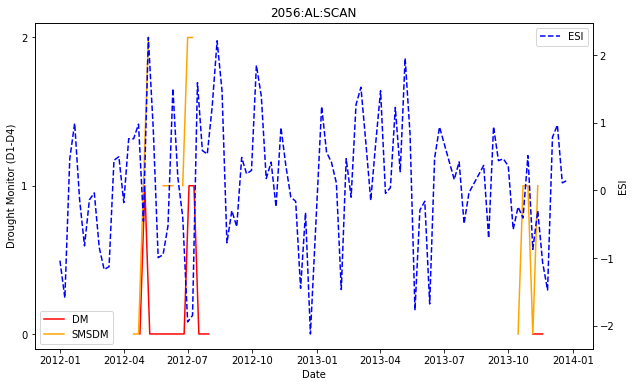

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(DM_test['Category'], label='DM', color='red')
ax.plot()
ax2 = ax.twinx()
ax2.plot(ESI_test['ESI'], label='ESI', linestyle='dashed', color='blue')
ax2.legend()
ax.set_ylabel('Drought Monitor (D1-D4)')
ax2.set_ylabel('ESI')
ax.set_xlabel('Date')
ax.set_title(DM_test['station'].unique().item())
ax.plot(SMSDM_test['4inSMSDC'], label="SMSDM", color='orange')
ax.legend(loc='lower left')
ax.yaxis.set_ticks([0,1,2])

In [19]:
SMSDM_test

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2012-01-01,-1.036,2056:AL:SCAN,52,52,0.530074,0.773755,0.901517,0.398306,1.263294,66.677599,77.002967,82.548998,62.741899,92.298303,NaN,NaN,NaN,NaN,NaN
2012-01-08,-1.587,2056:AL:SCAN,1,1,-1.129205,-0.240322,0.653609,0.331736,1.538225,13.392369,39.659895,73.469162,59.484698,96.753326,1.0,NaN,NaN,NaN,NaN
2012-01-15,0.468,2056:AL:SCAN,2,2,0.607961,0.629268,1.104360,0.340749,1.342732,69.935498,70.623145,88.506256,59.957246,93.848407,NaN,NaN,NaN,NaN,NaN
2012-01-22,0.993,2056:AL:SCAN,3,3,0.137346,0.442041,1.572774,0.285516,1.345538,52.629277,63.558548,96.966006,57.493249,93.897229,NaN,NaN,NaN,NaN,NaN
2012-01-29,-0.133,2056:AL:SCAN,4,4,0.576963,0.714880,1.379145,0.468891,1.394955,68.743850,74.503538,94.474588,65.948470,94.751617,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-26,-1.470,2056:AL:SCAN,48,48,-1.189684,-0.243622,-2.253057,-0.765908,NaN,11.916475,39.557179,0.996567,21.703420,NaN,1.0,NaN,4.0,0.0,NaN
2013-12-03,0.788,2056:AL:SCAN,49,49,-1.167394,-0.160547,-1.002094,0.101743,NaN,12.419372,42.353344,15.867567,49.662466,NaN,1.0,NaN,1.0,NaN,NaN
2013-12-10,0.966,2056:AL:SCAN,50,50,0.123019,0.591791,-0.861794,0.564228,NaN,52.038920,69.322073,19.577013,69.846985,NaN,NaN,NaN,1.0,NaN,NaN


In [20]:
#now we are goin to test cumulative fall for drought 2007
DM_test = drought_data[drought_data['station']=='2078:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']

In [21]:
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

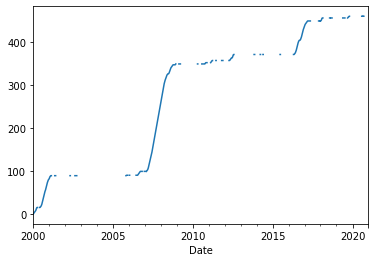

In [22]:
DM_test['Category'].cumsum().plot()

In [23]:
#fixing datetime
ESI_test.index = pd.to_datetime(ESI_test.index)

<AxesSubplot:xlabel='Date'>

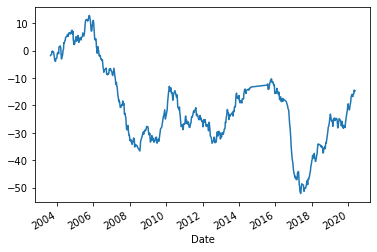

In [24]:
ESI_test['ESI'].cumsum().plot()

In [25]:
#fixing datetime
SMSDM_test.index = pd.to_datetime(SMSDM_test.index)

Text(0.5, 0, 'Date')

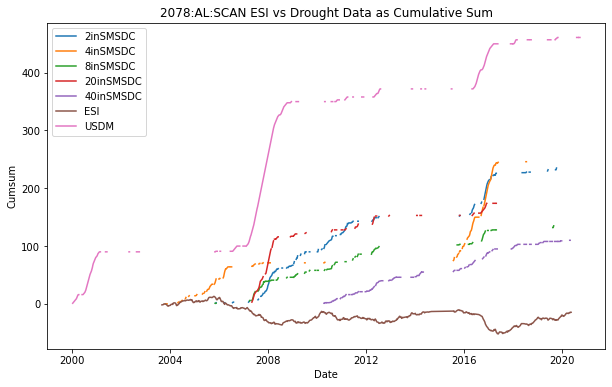

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(SMSDM_test['2inSMSDC'].cumsum(), label='2inSMSDC')
ax.plot(SMSDM_test['4inSMSDC'].cumsum(), label='4inSMSDC')
ax.plot(SMSDM_test['8inSMSDC'].cumsum(), label='8inSMSDC')
ax.plot(SMSDM_test['20inSMSDC'].cumsum(), label='20inSMSDC')
ax.plot(SMSDM_test['40inSMSDC'].cumsum(), label='40inSMSDC')
ax.plot(ESI_test['ESI'].cumsum(), label='ESI')
ax.plot(DM_test['Category'].cumsum(), label='USDM')
ax.legend()
ax.set_title('2078:AL:SCAN ESI vs Drought Data as Cumulative Sum')
ax.set_ylabel('Cumsum')
ax.set_xlabel('Date')

Text(0.5, 1.0, '2078:AL:SCAN Drought Categroy vs ESI Raw Data')

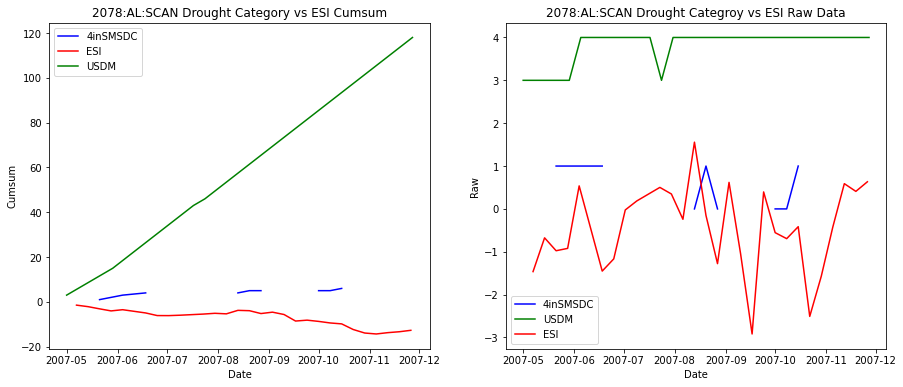

In [27]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
ax[0].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'].cumsum(), label='4inSMSDC', color='blue')
ax[0].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax[0].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'].cumsum(), label='USDM', color='green')
ax[0].legend()
ax[1].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='blue')
ax[1].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax[1].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'], label='ESI', color='red')
ax[1].legend()
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumsum')
ax[0].set_title('2078:AL:SCAN Drought Category vs ESI Cumsum')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Raw')
ax[1].set_title('2078:AL:SCAN Drought Categroy vs ESI Raw Data')

In [28]:
DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]

,point,Category,Station Name,station
Date,,,,
2007-05-01,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-08,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-15,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-22,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-29,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-06-05,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-12,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-19,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-26,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN


Text(0, 0.5, 'Drought Category')

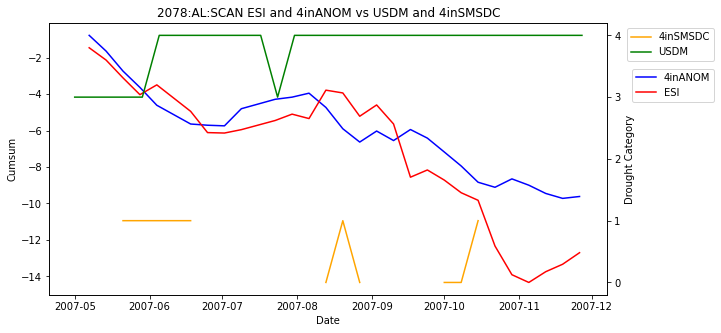

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inANOM'].cumsum(), label='4inANOM', color='blue')
ax.plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax2=ax.twinx()
ax2.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='orange')
ax2.plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Cumsum')
ax.set_title('2078:AL:SCAN ESI and 4inANOM vs USDM and 4inSMSDC')
ax2.legend(bbox_to_anchor=(1.20, 1.0), loc='upper right')
ax.legend(bbox_to_anchor=(1.20, 0.85), loc='upper right')
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax2.set_ylabel('Drought Category')

<AxesSubplot:xlabel='Date'>

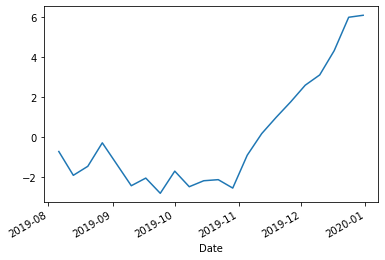

In [43]:
ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum().plot()

<AxesSubplot:xlabel='Date'>

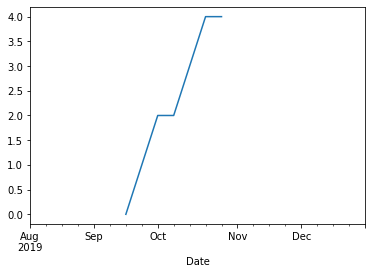

In [44]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum().plot() 

In [47]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum()

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-03    NaN
2019-09-10    NaN
2019-09-17    0.0
2019-09-24    1.0
2019-10-01    2.0
2019-10-08    2.0
2019-10-15    3.0
2019-10-22    4.0
2019-10-29    4.0
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    4.0
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: Category, dtype: float64

<AxesSubplot:xlabel='Date'>

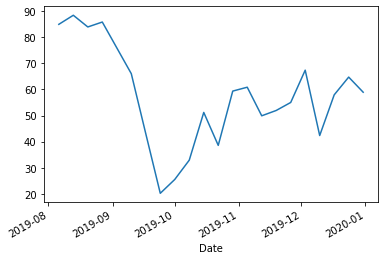

In [52]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4in_pr'].plot()

<AxesSubplot:xlabel='Date'>

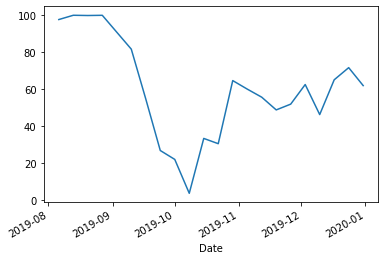

In [53]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2in_pr'].plot()

In [55]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2019-08-06,-0.731,2078:AL:SCAN,32,32,1.638670,0.991352,-0.100813,0.823698,-0.569001,97.398054,84.866469,43.450338,80.186769,29.842549,NaN,NaN,NaN,NaN,0.0
2019-08-13,-1.194,2078:AL:SCAN,33,33,2.173916,1.104749,-2.118304,NaN,-0.485669,99.704821,88.335996,1.428413,NaN,32.478945,NaN,NaN,4.0,NaN,NaN
2019-08-20,0.452,2078:AL:SCAN,34,34,2.108838,0.962681,-0.703471,0.686324,-0.547122,99.573631,83.862132,24.128004,74.392439,30.562675,NaN,NaN,0.0,NaN,NaN
2019-08-27,1.177,2078:AL:SCAN,35,35,2.167247,1.012472,-1.753205,0.750613,-0.322283,99.682956,85.745264,3.454767,77.160216,38.178933,NaN,NaN,3.0,NaN,NaN
2019-09-10,-2.151,2078:AL:SCAN,37,37,0.897431,0.506653,1.942781,0.243146,-0.663474,81.447469,66.000913,99.069870,55.591809,26.925424,NaN,NaN,NaN,NaN,0.0
2019-09-17,0.383,2078:AL:SCAN,38,38,0.194134,-0.140454,2.001121,0.007580,-0.749250,54.597136,43.038119,99.169527,46.253375,23.983889,NaN,NaN,NaN,NaN,0.0
2019-09-24,-0.763,2078:AL:SCAN,39,39,-0.651359,-0.855910,1.437879,-0.099714,-0.680483,26.833935,20.246519,95.371498,42.664266,26.498230,0.0,NaN,NaN,NaN,0.0
2019-10-01,1.111,2078:AL:SCAN,40,40,-0.808681,-0.684659,1.663948,-0.286388,-0.766384,22.029081,25.542114,97.730041,36.318632,23.459050,0.0,0.0,NaN,NaN,0.0
2019-10-08,-0.781,2078:AL:SCAN,41,41,-1.686217,-0.455703,1.833979,-0.402388,-0.742904,3.771728,32.926273,98.638025,32.673267,24.191383,3.0,NaN,NaN,NaN,0.0


Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

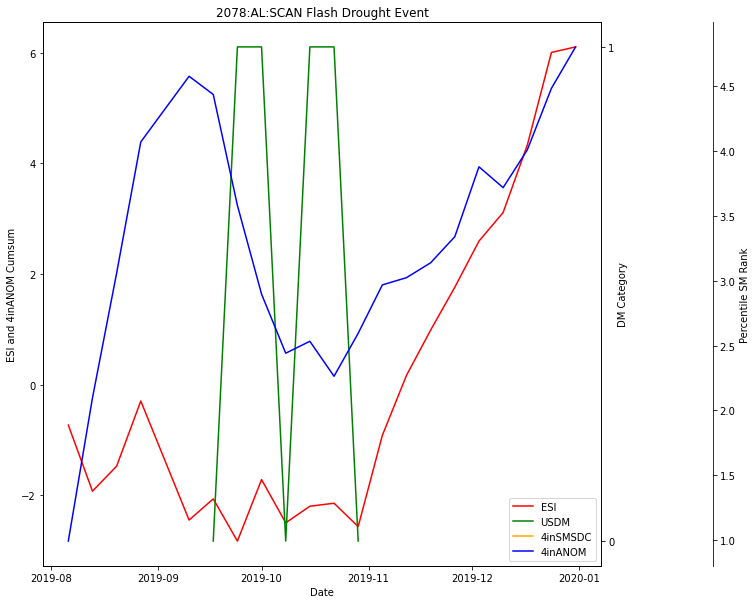

In [140]:
fig, ax = plt.subplots(figsize=(10,10))
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inANOM'].cumsum(), label="4inANOM", color='blue')

#smdm2, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2inSMSDC'], label="2inSMDC", color='yellow')
ax.legend(handles=[esi, dm, smdm, sm4], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')

In [141]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC']

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-10    NaN
2019-09-17    NaN
2019-09-24    NaN
2019-10-01    0.0
2019-10-08    NaN
2019-10-15    NaN
2019-10-22    NaN
2019-10-29    NaN
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    NaN
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: 4inSMSDC, dtype: float64

Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

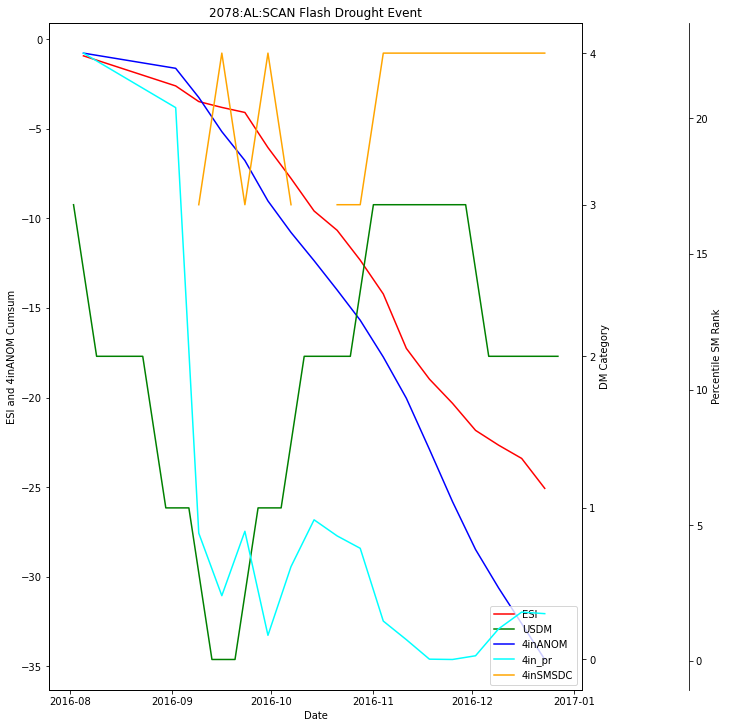

In [135]:
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2016)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.set_yticks([0, 1, 2, 3, 4]) 
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2016)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inANOM'].cumsum(), label="4inANOM", color='blue')
smpr4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4in_pr'], label="4in_pr", color='cyan')
ax.legend(handles=[esi, dm, sm4, smpr4, smdm], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')